# Section 0 问题描述与完成项目流程

## 1. 问题描述


<img src="default.png" width="20%"></img>

在该项目中，你将使用强化学习算法，实现一个自动走迷宫机器人。

1. 如上图所示，智能机器人显示在右上角。在我们的迷宫中，有陷阱（红色炸弹）及终点（蓝色的目标点）两种情景。机器人要尽量避开陷阱、尽快到达目的地。
2. 小车可执行的动作包括：向上走 `u`、向右走 `r`、向下走 `d`、向左走 `l`。
3. 执行不同的动作后，根据不同的情况会获得不同的奖励，具体而言，有以下几种情况。
    - 撞到墙壁：-10
    - 走到终点：50
    - 走到陷阱：-30
    - 其余情况：-0.1
4. 我们需要通过修改 `robot.py` 中的代码，来实现一个 Q Learning 机器人，实现上述的目标。

## 2. 完成项目流程

1. 配置环境，使用 `envirnment.yml` 文件配置名为 `robot-env` 的 conda 环境，具体而言，你只需转到当前的目录，在命令行/终端中运行如下代码，稍作等待即可。
```
conda env create -f envirnment.yml
```
安装完毕后，在命令行/终端中运行 `source activate robot-env`（Mac/Linux 系统）或 `activate robot-env`（Windows 系统）激活该环境。

2. 阅读 `main.ipynb` 中的指导完成项目，并根据指导修改对应的代码，生成、观察结果。
3. 导出代码与报告，上传文件，提交审阅并优化。
---

---

# Section 1 算法理解


## 1. 1 强化学习总览

强化学习作为机器学习算法的一种，其模式也是让智能体在“训练”中学到“经验”，以实现给定的任务。但不同于监督学习与非监督学习，在强化学习的框架中，我们更侧重通过智能体与环境的**交互**来学习。通常在监督学习和非监督学习任务中，智能体往往需要通过给定的训练集，辅之以既定的训练目标（如最小化损失函数），通过给定的学习算法来实现这一目标。然而在强化学习中，智能体则是通过其与环境交互得到的奖励进行学习。这个环境可以是虚拟的（如虚拟的迷宫），也可以是真实的（自动驾驶汽车在真实道路上收集数据）。


在强化学习中有五个核心组成部分，它们分别是：**环境（Environment）**、**智能体（Agent）**、**状态（State）**、**动作（Action）**和**奖励（Reward）**。在某一时间节点 $t$：
    
- 智能体在从环境中感知其所处的状态 $s_t$
- 智能体根据某些准则选择动作 $a_t$
- 环境根据智能体选择的动作，向智能体反馈奖励 $r_{t+1}$

通过合理的学习算法，智能体将在这样的问题设置下，成功学到一个在状态 $s_t$ 选择动作 $a_t$ 的策略 $\pi (s_t) = a_t$。

---

**问题 1**：请参照如上的定义，描述出 “机器人走迷宫这个问题” 中强化学习五个组成部分对应的实际对象：

- **环境** : 由边界、墙、陷阱、终点组成的迷宫。
- **状态** : 状态个数 = 迷宫长度 * 迷宫宽度


- **动作** : 
    - 'u': 向上走
    - 'r': 向右走
    - 'd': 向下走
    - 'l': 向左走
    
- **奖励** : 
    - -10: 撞到墙壁
    - 50: 到达终点，该值需要根据迷宫大小和陷阱个数进行调整
    - -30: 走进陷阱
    - -0.1: 其它情况

$$T(s^{'}, a, s) = P(s^{'}|a,s)$$


---

## 1.2 计算 Q 值 

在我们的项目中，我们要实现基于 Q-Learning 的强化学习算法。Q-Learning 是一个值迭代（Value Iteration）算法。与策略迭代（Policy Iteration）算法不同，值迭代算法会计算每个”状态“或是”状态-动作“的值（Value）或是效用（Utility），然后在执行动作的时候，会设法最大化这个值。因此，对每个状态值的准确估计，是我们值迭代算法的核心。通常我们会考虑**最大化动作的长期奖励**，即不仅考虑当前动作带来的奖励，还会考虑动作长远的奖励。

在 Q-Learning 算法中，我们把这个长期奖励记为 Q 值，我们会考虑每个 ”状态-动作“ 的 Q 值，具体而言，它的计算公式为：

$$
q(s_{t},a) = R_{t+1} + \gamma \times\max_a q(a,s_{t+1})
$$

也就是对于当前的“状态-动作” $(s_{t},a)$，我们考虑执行动作 $a$ 后环境给我们的奖励 $R_{t+1}$，以及执行动作 $a$ 到达 $s_{t+1}$后，执行任意动作能够获得的最大的Q值 $\max_a q(a,s_{t+1})$，$\gamma$ 为折扣因子。

不过一般地，我们使用更为保守地更新 Q 表的方法，即引入松弛变量 $alpha$，按如下的公式进行更新，使得 Q 表的迭代变化更为平缓。

$$
q(s_{t},a) = (1-\alpha) \times q(s_{t},a) + \alpha \times(R_{t+1} + \gamma \times\max_a q(a,s_{t+1}))
$$



---
<img src="default2.png" width="20%"></img>

**问题 2**：根据已知条件求 $q(s_{t},a)$，在如下模板代码中的空格填入对应的数字即可。


已知：如上图，机器人位于 $s_1$，行动为 `u`，行动获得的奖励与题目的默认设置相同。在 $s_2$ 中执行各动作的 Q 值为：`u`: -24，`r`: -13，`d`: -0.29、`l`: +40，$\gamma$ 取0.9。


$$
\begin{align}
q(s_{t},a) & = R_{t+1} + \gamma \times\max_a q(a,s_{t+1}) \\
 & =(-0.1) + (0.9)*(40) \\
 & =(35.9)
\end{align}
$$


---

## 1.3 如何选择动作

在强化学习中，「探索-利用」问题是非常重要的问题。具体来说，根据上面的定义，我们会尽可能地让机器人在每次选择最优的决策，来最大化长期奖励。但是这样做有如下的弊端：
1. 在初步的学习中，我们的 Q 值会不准确，如果在这个时候都按照 Q 值来选择，那么会造成错误。
2. 学习一段时间后，机器人的路线会相对固定，则机器人无法对环境进行有效的探索。

因此我们需要一种办法，来解决如上的问题，增加机器人的探索。由此我们考虑使用 epsilon-greedy 算法，即在小车选择动作的时候，以一部分的概率随机选择动作，以一部分的概率按照最优的 Q 值选择动作。同时，这个选择随机动作的概率应当随着训练的过程逐步减小。

---

**问题 3**：在如下的代码块中，实现 epsilon-greedy 算法的逻辑，并运行测试代码。

In [1]:
import random
import numpy as np

actions = ['u','r','d','l']
qline = {'u':1.2, 'r':-2.1, 'd':-24.5, 'l':27}
epsilon = 0.3 # 以0.3的概率进行随机选择

def choose_action(epsilon):
    
    action = None
    if random.uniform(0,1) < epsilon: # 以某一概率
        action = np.random.choice(actions)
    else: 
        action = max(qline, key=qline.get) # 否则选择具有最大 Q 值的动作
    return action

# 测试百万次，计算概率
n = 10**6
correct = {a: round(epsilon/len(actions),3) for a in actions}
correct[max(qline, key=qline.get)] = round(1 - epsilon + epsilon/len(actions),3)
pick = {a:0 for a in actions}
# print(correct)
for i in range(n):
    pick[choose_action(epsilon)] += 1

result = {}
flag = True
for a in actions:
    result[a] = round(pick[a]/n, 3)
    if result[a] < correct[a]-0.001 or result[a] > correct[a]+0.001:
        print('{}: {}, test failed!!!'.format(a, result[a]))
        flag = False
        break
if flag:
    print('test succeed!!!')


test succeed!!!


---

---

# Section 2 代码实现

## 2.1. `Maze` 类理解

我们首先引入了迷宫类 `Maze`，这是一个非常强大的函数，它能够根据你的要求随机创建一个迷宫，或者根据指定的文件，读入一个迷宫地图信息。

1. 使用 `Maze("file_name")` 根据指定文件创建迷宫，或者使用 `Maze(maze_size=(height,width))` 来随机生成一个迷宫。
2. 使用 `trap_number` 参数，在创建迷宫的时候，设定迷宫中陷阱的数量。
3. 直接键入迷宫变量的名字按回车，展示迷宫图像（如 `g=Maze("xx.txt")`，那么直接输入 `g` 即可。
4. 建议生成的迷宫尺寸，长在 6~12 之间，宽在 10～12 之间。

---

**问题 4**：在如下的代码块中，创建你的迷宫并展示。

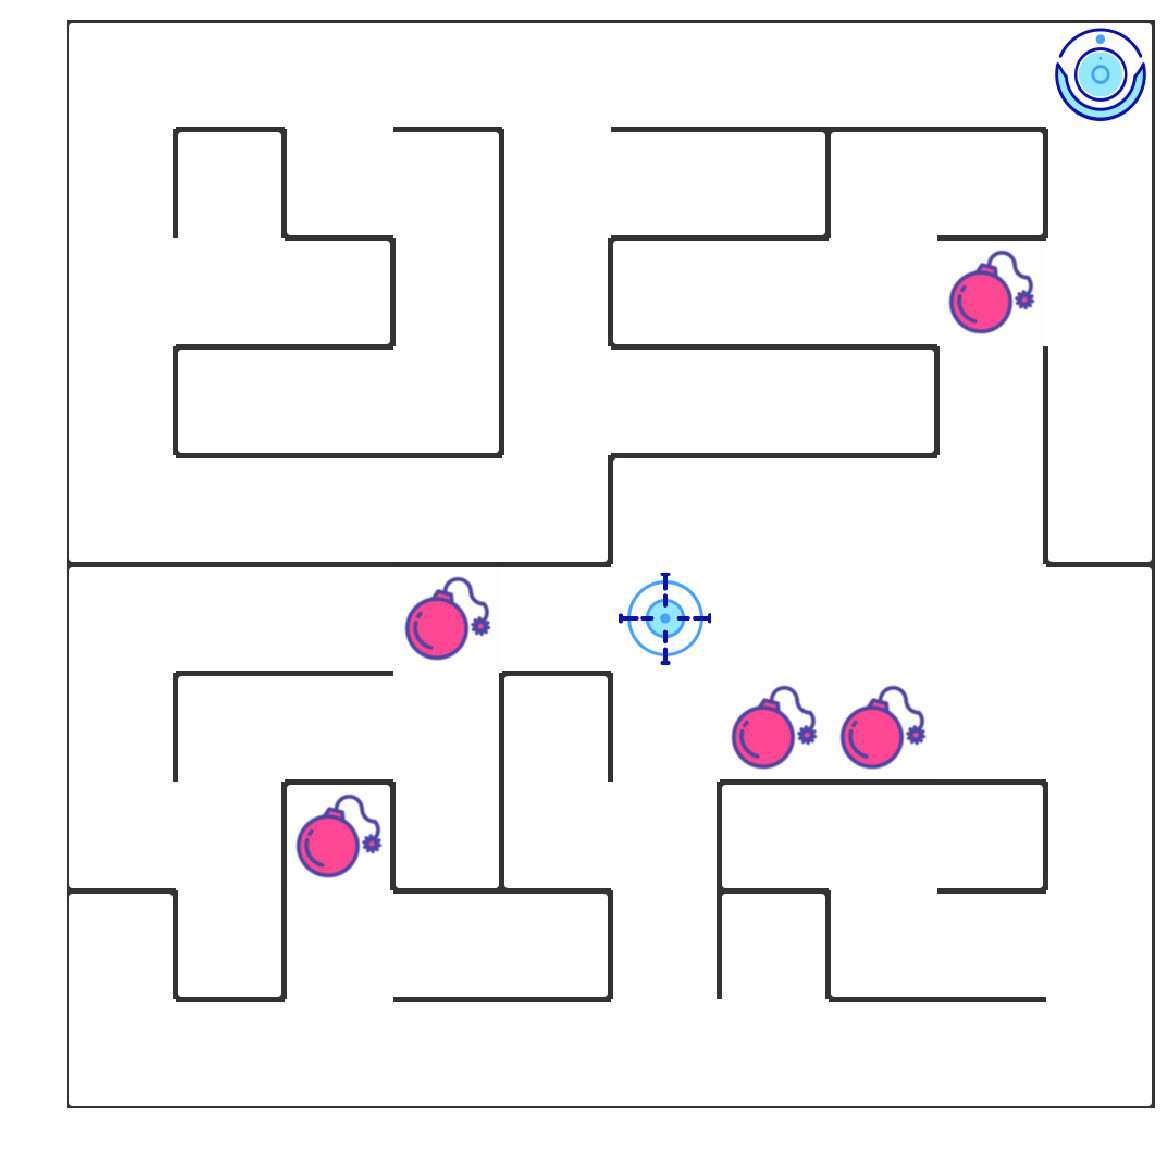

Maze of size (10, 10)

In [2]:
import Maze

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## todo: 创建迷宫并展示
maze = Maze.Maze(maze_size=(10,10))
maze

---

你可能已经注意到，在迷宫中我们已经默认放置了一个机器人。实际上，我们为迷宫配置了相应的 API，来帮助机器人的移动与感知。其中你随后会使用的两个 API 为 `maze.sense_robot()` 及 `maze.move_robot()`。

1. `maze.sense_robot()` 为一个无参数的函数，输出机器人在迷宫中目前的位置。
2. `maze.move_robot(direction)` 对输入的移动方向，移动机器人，并返回对应动作的奖励值。

---

**问题 5**：随机移动机器人，并记录下获得的奖励，展示出机器人最后的位置。

(0, 8)


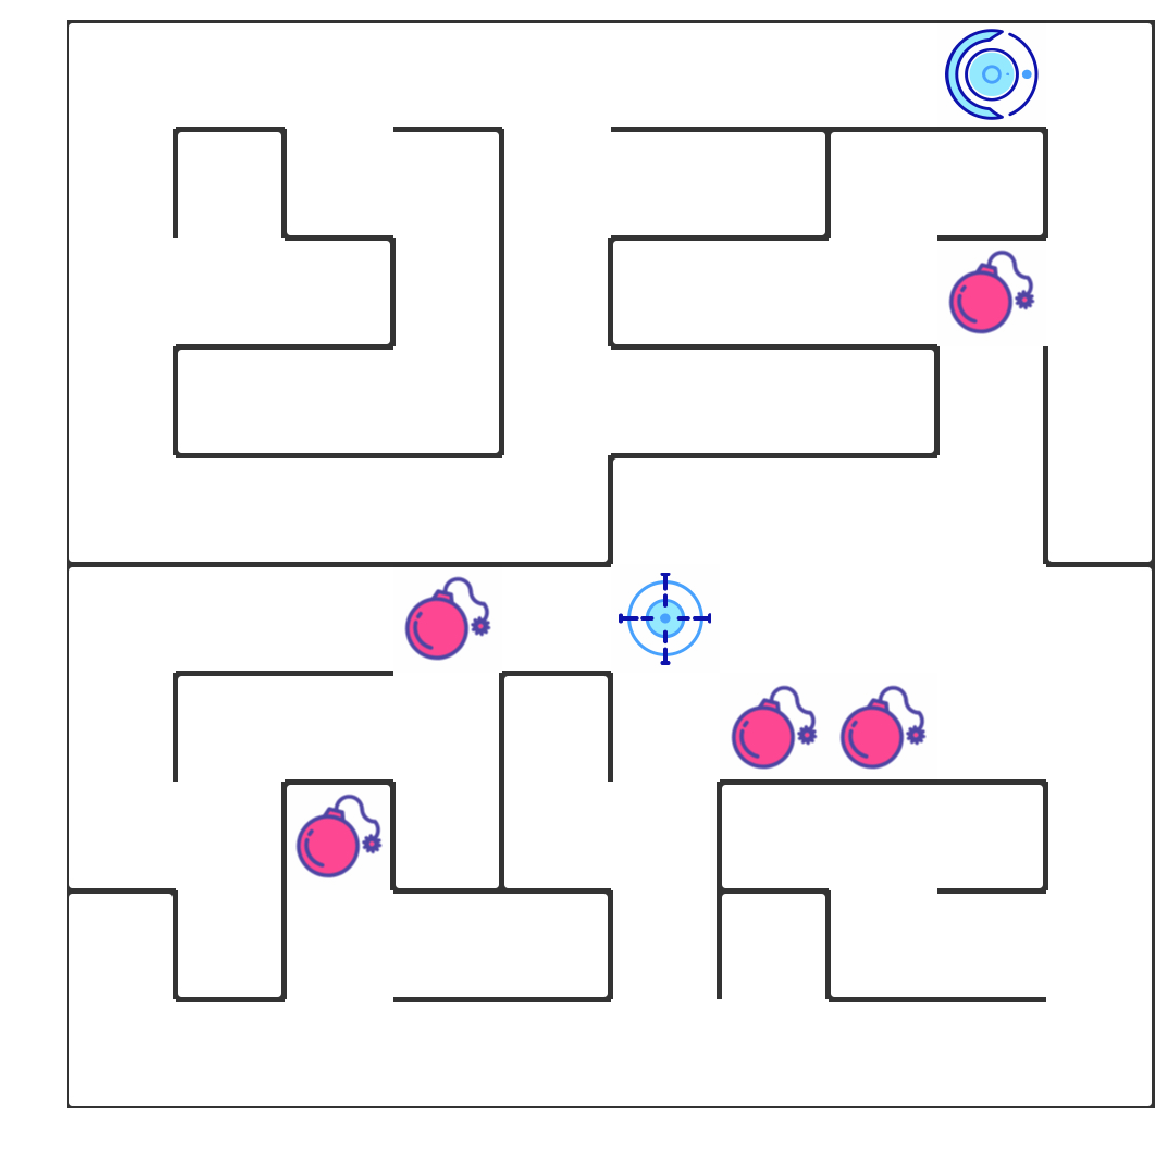

Maze of size (10, 10)

In [3]:
rewards = []

## 循环、随机移动机器人10次，记录下奖励
for i in range(10):
    rewards.append(maze.move_robot(np.random.choice(actions)))

## 输出机器人最后的位置
print(maze.sense_robot())

## 打印迷宫，观察机器人位置
maze

## 2.2. `Robot` 类实现

`Robot` 类是我们需要重点实现的部分。在这个类中，我们需要实现诸多功能，以使得我们成功实现一个强化学习智能体。总体来说，之前我们是人为地在环境中移动了机器人，但是现在通过实现 `Robot` 这个类，机器人将会自己移动。通过实现学习函数，`Robot` 类将会学习到如何选择最优的动作，并且更新强化学习中对应的参数。

首先 `Robot` 有多个输入，其中 `alpha=0.5, gamma=0.9, epsilon0=0.5` 表征强化学习相关的各个参数的默认值，这些在之前你已经了解到，`Maze` 应为机器人所在迷宫对象。

随后观察 `Robot.update` 函数，它指明了在每次执行动作时，`Robot` 需要执行的程序。按照这些程序，各个函数的功能也就明了了。

最后你需要实现 `Robot.py` 代码中的8段代码，他们都在代码中以 `#TODO` 进行标注，你能轻松地找到他们。

---

**问题 6**：实现 `Robot.py` 中的8段代码，并运行如下代码检查效果（记得将 `maze` 变量修改为你创建迷宫的变量名）。



In [4]:
import Robot

maze6 = Maze.Maze(maze_size=(10, 10))
robot = Robot.Robot(maze6) # 记得将 maze 变量修改为你创建迷宫的变量名
robot.set_status(learning=True,testing=False)
print(robot.update())


('u', -10.0)


---

## 2.3 用 `Runner` 类训练 Robot

在实现了上述内容之后，我们就可以开始对我们 `Robot` 进行训练并调参了。我们为你准备了又一个非常棒的类 `Runner`，来实现整个训练过程及可视化。使用如下的代码，你可以成功对机器人进行训练。并且你会在当前文件夹中生成一个名为 `filename` 的视频，记录了整个训练的过程。通过观察该视频，你能够发现训练过程中的问题，并且优化你的代码及参数。

---

**问题 7**：尝试利用下列代码训练机器人，并进行调参。可选的参数包括：

- 训练参数
    - 训练次数 `epoch`
- 机器人参数：
    - `epsilon0` (epsilon 初值)
    - `epsilon`衰减（可以是线性、指数衰减，可以调整衰减的速度），你需要在 Robot.py 中调整
    - `alpha`
    - `gamma`
- 迷宫参数:
    - 迷宫大小
    - 迷宫中陷阱的数量

In [5]:
## 可选的参数：
epoch = 300

epsilon0 = 1.0
alpha = 0.5
gamma = 0.9

maze_size = (10,10)
trap_number = 5

In [6]:
import Runner

g = Maze.Maze(maze_size=maze_size,trap_number=trap_number)
r = Robot.Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
r.set_status(learning=True)

runner = Runner.Runner(r, g)
runner.run_training(epoch, training_per_epoch=1000, display_direction=True)
# runner.generate_movie(filename = "final1.mp4") # 你可以注释该行代码，加快运行速度，不过你就无法观察到视频了。

D:\Anaconda3\envs\robot-env\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
D:\Anaconda3\envs\robot-env\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


- 估计值更新公式：$$ Q(S_{t}) = (1 - \alpha) * Q(S_{t}) + \alpha * (R_{t} + \gamma * Q(S_{t+1}))$$
- epsilon-greedy算法
    - 背景知识：在强化学习中需要平衡探索和利用的关系，不同的问题，同一个问题不同的规模，平衡的点都不一样。我们可以这样理解探索和利用。  
        ‘探索’，积攒经验的过程，可以不经过思考的选择动作，即以相同的概率选择动作。‘利用’，利用探索阶段积攒的经验，即每个时间步都选择奖励最高的动作，利用经验的同时也能够验证经验的正确性。  
        随着探索的次数越来越多，每个状态-动作对的奖励都能够很好的估计出来，这时就可以利用这些经验获取到累积最大期望奖励了。  
    - epsilon-greedy算法就是通过一个概率来平衡探索和利用之间的关系。以epsilon的概率随机探索，以1-epsilon的概率最优利用。  
        学习初期，QTable中有价值的数据不多，需要一个大的概率(epsilon)进行概率以获取更多有价值的数据。  
        随着尝试次数的增加，需要以更高的概率(1-epsilon)去利用这些经验同时达到巩固正确经验的效果，即降低epsilon的值。  
        所以随着学习的进行，尝试次数的增加，我们需要慢慢的降低epsilon的值。  
    - epsilon的初始化和衰减函数  
        环境越复杂，选择越多，我们就越需要更高的epsilon初值和缓慢的衰减函数。  
        以迷宫为例：  
        迷宫小、陷阱少：以较小的epsilon初值和快速的衰减函数便可以找到最有的行走路径。  
        迷宫大、陷阱多：尽量设置epsilon初值为最大值1.0，衰减函数要缓慢。
        同时根据实际环境，也可以将衰减函数定义为分段函数，前期缓慢陷阱，超过某一个阈值后快速下降。  
        
- gamma参数  
    - gamma为未来奖励折扣因子，更新公式为：$$ Q(S_{t}) = R_{t} + Q(S_{t+1}) = R_{t} + \sum_{i=t+1}^N\gamma^{i-t}R_{i}$$  
    从公式出发进行分析，当前状态的估值由两部分组成：即时奖励、未来奖励。
        - 即时奖励是可以百分之百信任的，因此可以直接采用。
        - 未来奖励则是不可预期的，我们只能根据以往经验进行估算，以往经验其实就是上一次实践中得到的未来奖励值。引入gamma值就是用数字来衡量对未来奖励的信任度，它的范围是\[0, 1\]，取0值则表示对未来奖励完全不信任，因此只使用即时奖励作为估值使用。取1值则表示完全信任未来奖励的准确性。  
        未来奖励中还涉及另一个很重要的信息，离当前状态越远的状态值越不信任，因此通过对gamma进行N次方的方式来实现随着状态的远离信任度下降的理念。   
    gamma值越小，目标奖励向初始点传播的速度越慢，因此需要很长的时间进行学习，最终也有可能找不到通往目的地的最优路径。
    gamma值变大会加快目标奖励的传播速度，与此同时也会加快陷阱惩罚的传播速度。  

- alpha参数
    公式：$$ Q(s) = (1 - \alpha)Q(s) + \alpha * Q(curr) $$
    由于每一次选择动作时，都是按概率进行选择的，因此上一次计算得到Q值和本次计算得到Q值哪个更加合适是没有定数的。因此引入一个alpha参数作为比例将相邻的两次经验融合成一个经验。  
    alpha值越高表示越相信当前计算得到的Q值，相反，alpha值越低则是更相信上一次的Q值。  
    在学习的前期，为了更好的探索，选择动作时更加趋向于随机，因此每次计算得到的Q值基本无规律可言。到了学习后期，选择动作时更加趋向于奖励最大的动作，因此计算得到的Q值可能大致呈上升趋势。  
    因此选择\[0.4, 0.6\]的值比较合适。不偏向于任何一侧。  

---

使用 `runner.plot_results()` 函数，能够打印机器人在训练过程中的一些参数信息。

- Success Times 代表机器人在训练过程中成功的累计次数，这应当是一个累积递增的图像。
- Accumulated Rewards 代表机器人在每次训练 epoch 中，获得的累积奖励的值，这应当是一个逐步递增的图像。
- Running Times per Epoch 代表在每次训练 epoch 中，小车训练的次数（到达终点就会停止该 epoch 转入下次训练），这应当是一个逐步递减的图像。

---

**问题 8**：使用 `runner.plot_results()` 输出训练结果，根据该结果对你的机器人进行分析。

- 指出你选用的参数如何，选用参数的原因。
- 建议你比较不同参数下机器人的训练的情况。
- 训练的结果是否满意，有何改进的计划。

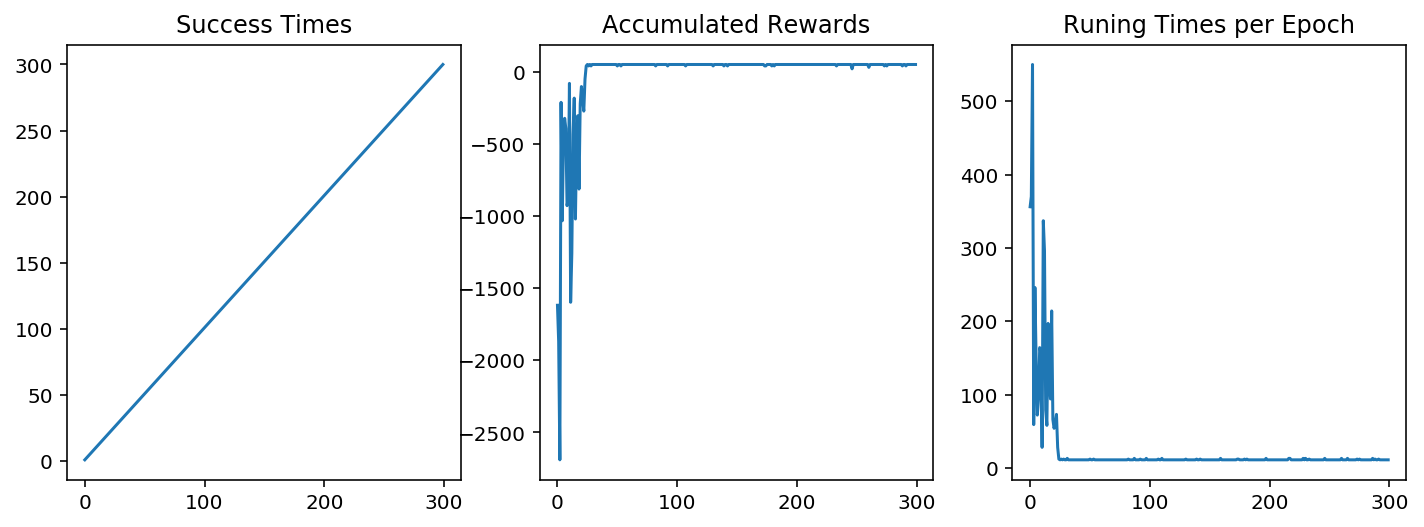

In [7]:
runner.plot_results()

In [8]:
print(runner.train_robot_statics['times'][-5:])

[11, 11, 11, 11, 11]


In [9]:
print(runner.train_robot_statics['reward'][-5:])

[49.0, 49.0, 49.0, 49.0, 49.0]


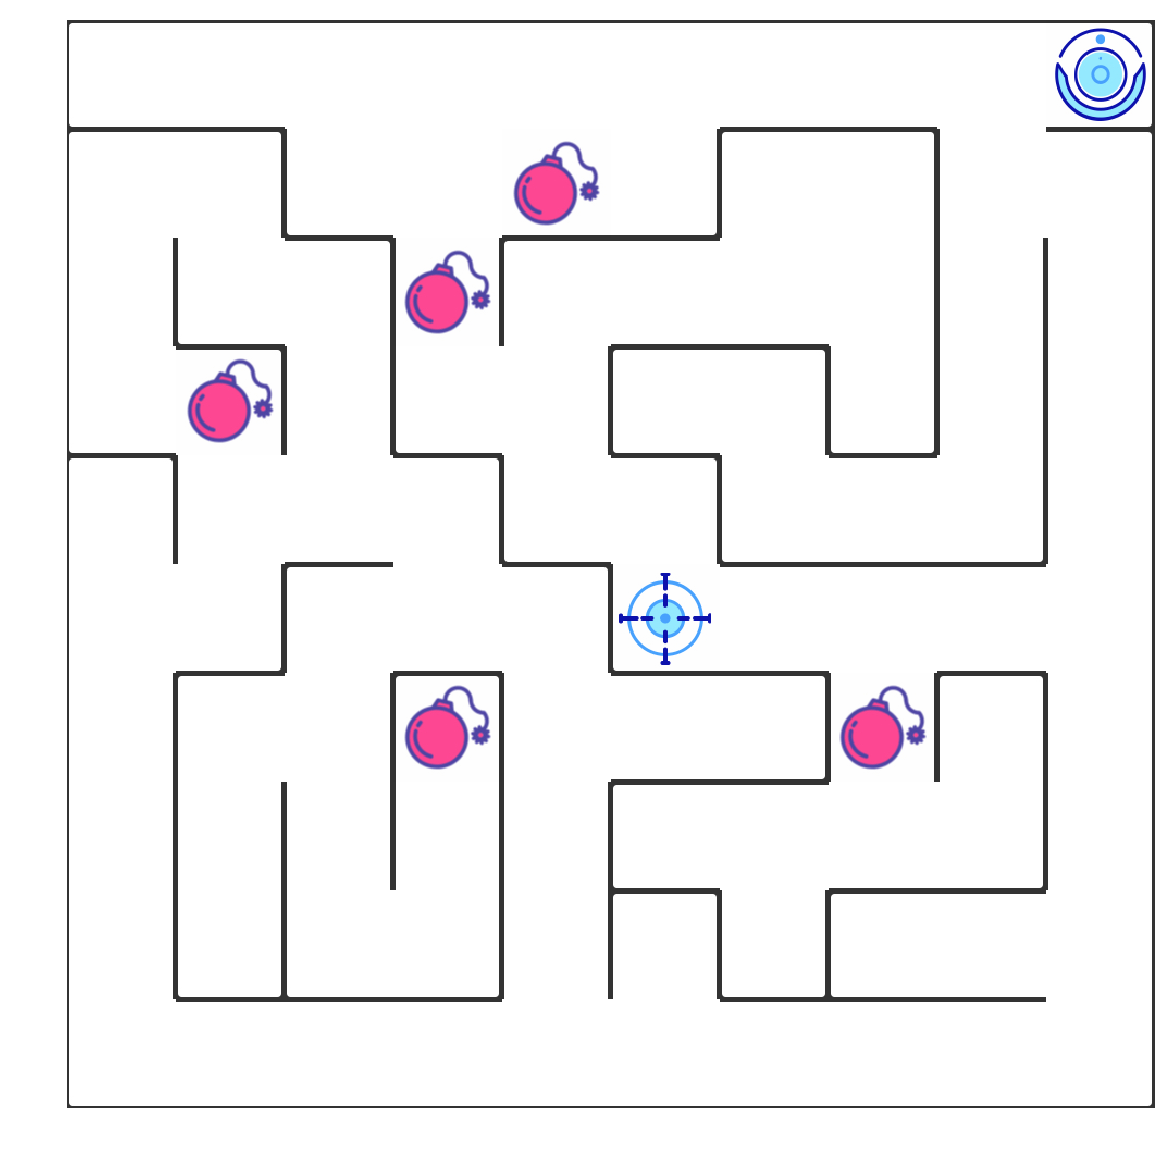

Maze of size (10, 10)

In [10]:
# runner.generate_movie('selftest.mp4')
g

### 测试场景
1. 地图大小：10\*10，陷阱个数：5， 机器人到目的地路径上没有陷阱。
2. 地图大小：10\*10，陷阱个数：5， 机器人到目的地路径上至少有一个陷阱。

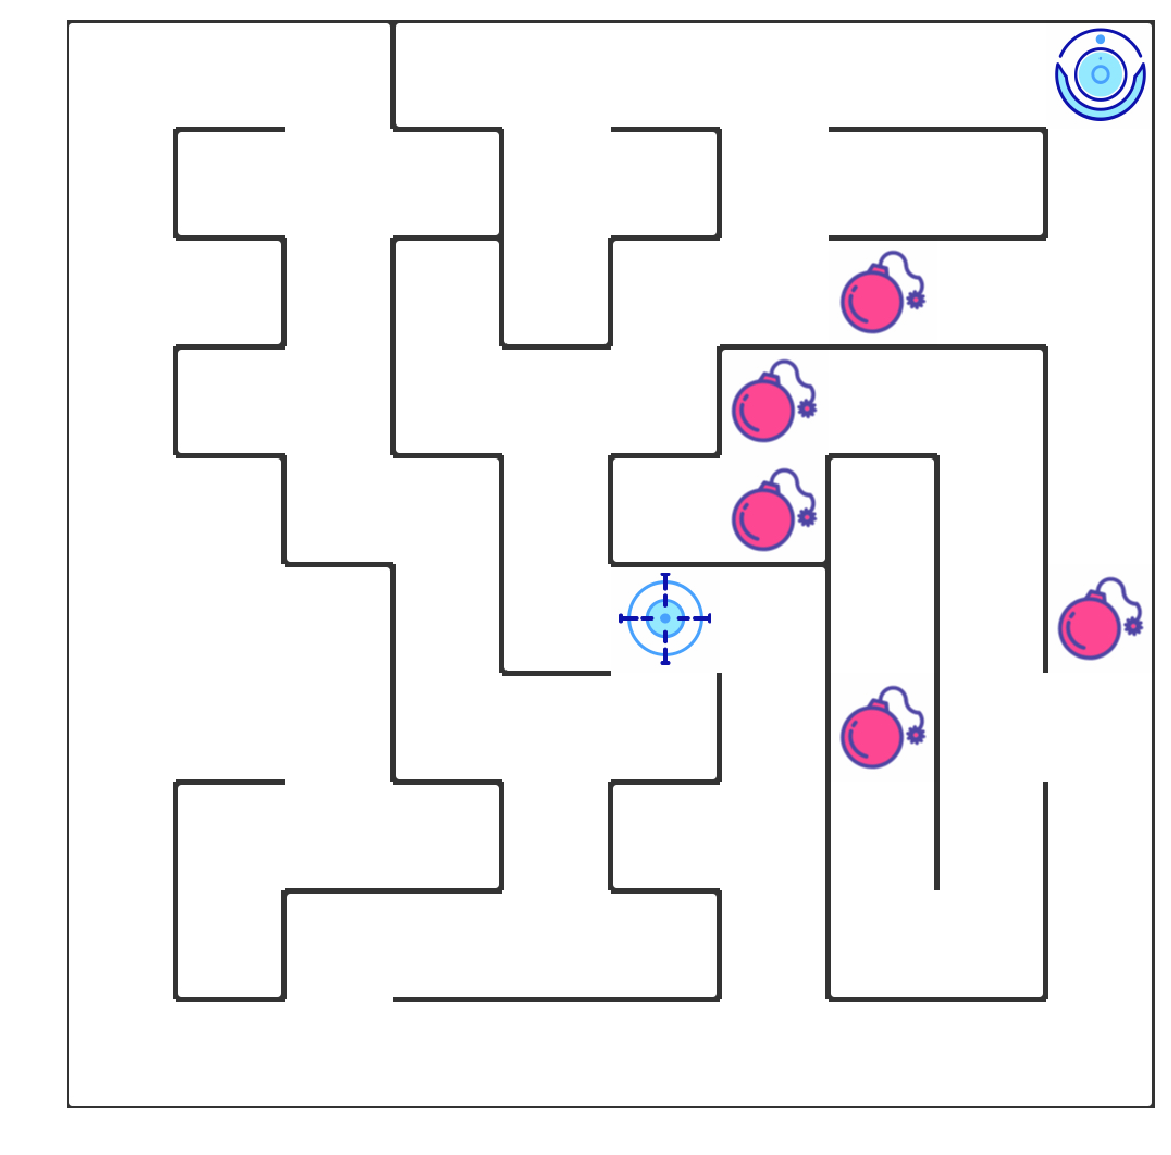

Maze of size (10, 10)

In [66]:
# 测试代码

# 场景一
g1 = Maze.Maze(maze_size=(10, 10), trap_number=5)
g1

In [68]:
epoch = 1000
epsilon0 = 0.9

In [69]:
import sys
result = {}
for alpha in [round(0.1*i,2) for i in range(4,7)]:
    for gamma in [round(0.1*i,2) for i in range(1,10)]:
        r1 = Robot.Robot(g1,alpha=0.5, epsilon0=epsilon0, gamma=gamma)
        r1.set_status(learning=True)

        runner1 = Runner.Runner(r1, g1)
        runner1.run_training(epoch, training_per_epoch=1000, display_direction=True)
        print("\ralpha: {} gamma: {}".format(alpha, gamma), end="")
        sys.stdout.flush()
#         runner1.plot_results()
        result[(alpha, gamma)] = [runner1.train_robot_statics['times'], runner1.train_robot_statics['reward']]

D:\Anaconda3\envs\robot-env\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
D:\Anaconda3\envs\robot-env\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


alpha: 0.6 gamma: 0.9

In [70]:
from operator import itemgetter
# 最快收敛
fast_convergence = {}
for k,v in result.items():
    for i in range(len(v[0])-10):
        if np.mean(v[0][i:i+10]) < 12.0:
            fast_convergence[k] = i
            break
print(sorted(fast_convergence.items(), key=itemgetter(1))[:5])

# 最快实现完美收敛，即后续所有epoch都是9步到达目的地
perfect_fast_convergence = {}
for k,v in result.items():
    for i in range(len(v[0])):
        if np.mean(v[0][i:]) == 11.0:
            perfect_fast_convergence[k] = i
            break
print(sorted(perfect_fast_convergence.items(), key=itemgetter(1))[:5])

[((0.5, 0.1), 16), ((0.5, 0.4), 16), ((0.5, 0.9), 16), ((0.4, 0.1), 17), ((0.4, 0.3), 17)]
[((0.5, 0.8), 930), ((0.5, 0.7), 954), ((0.4, 0.6), 956), ((0.6, 0.7), 959), ((0.4, 0.4), 961)]


**测试场景一结论：**  
1. alpha=0.5 gamma=0.7时，能够实现最快的收敛，但是并不稳定，后续还是会出现机器人转圈的情况
2. alpha=0.4 gamma=0.9时，能够实现最快的稳定收敛，在第930 epoch开始，后续所有的epoch都是走的稳定路径

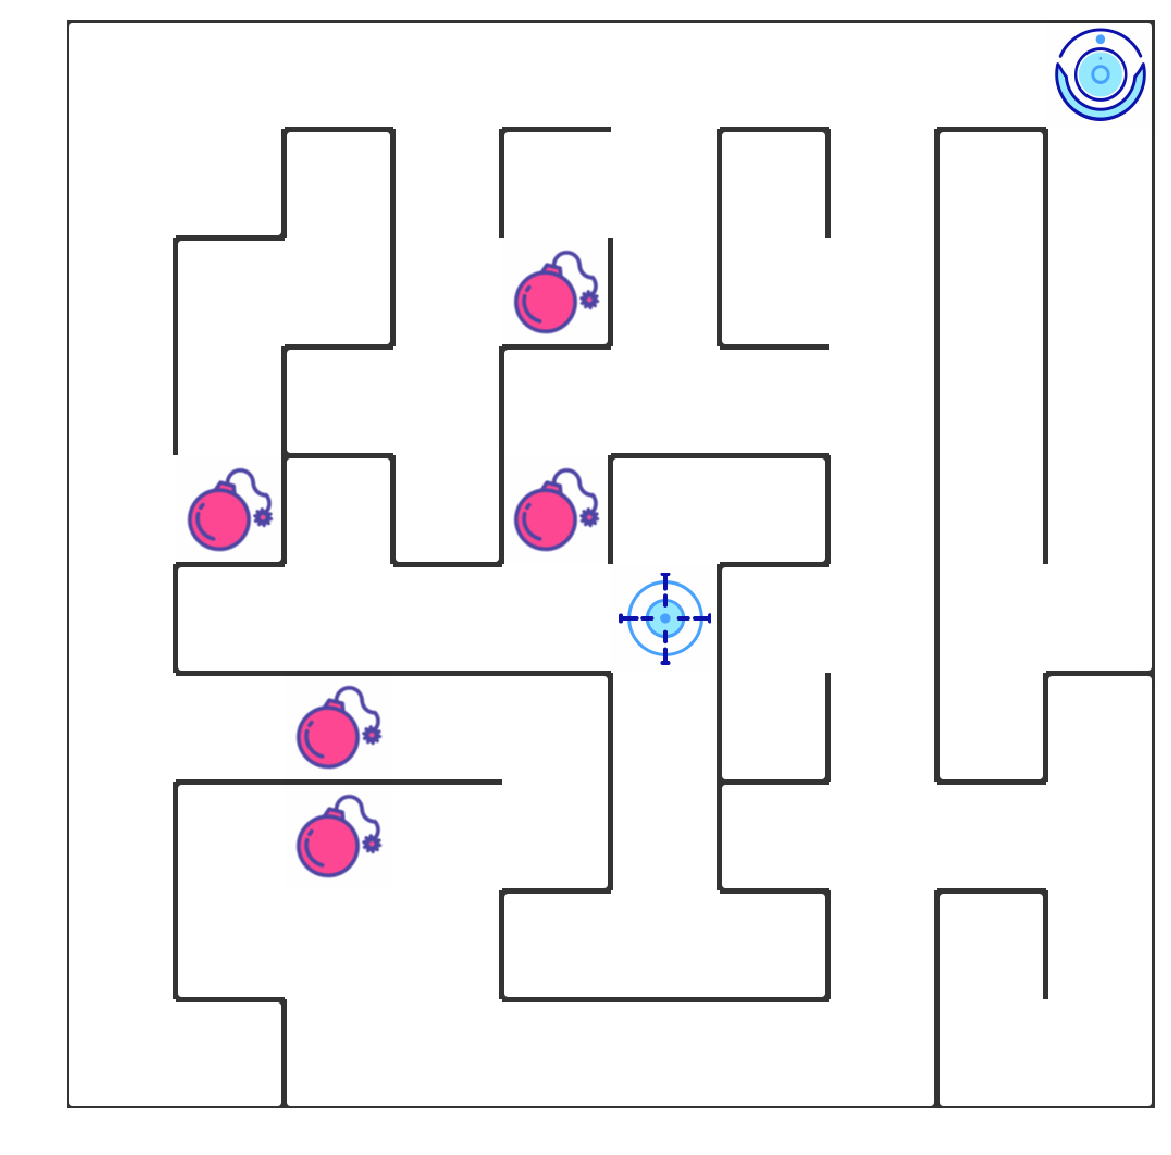

Maze of size (10, 10)

In [79]:
# 场景二：
g2 = Maze.Maze(maze_size=(10, 10), trap_number=5)
g2

In [80]:
epoch = 1000
epsilon0 = 0.9

In [ ]:
import sys
result1 = {}
for alpha in [round(0.1*i,2) for i in range(4,7)]:
    for gamma in [round(0.1*i,2) for i in range(1,10)]:
        r1 = Robot.Robot(g1,alpha=0.5, epsilon0=epsilon0, gamma=gamma)
        r1.set_status(learning=True)

        runner1 = Runner.Runner(r1, g2)
        print("\ralpha: {} gamma: {}".format(alpha, gamma), end="")
        runner1.run_training(epoch, training_per_epoch=1000, display_direction=True)
        sys.stdout.flush()
#         runner1.plot_results()
        result1[(alpha, gamma)] = [runner1.train_robot_statics['times'], runner1.train_robot_statics['reward']]

alpha: 0.5 gamma: 0.6

In [52]:
from operator import itemgetter
# 最快收敛
fast_convergence = {}
for k,v in result1.items():
    for i in range(len(v[0])-10):
        if np.mean(v[0][i:i+10]) < 12.0:
            fast_convergence[k] = i
            break
print(sorted(fast_convergence.items(), key=itemgetter(1))[:5])

# 最快实现完美收敛，即后续所有epoch都是9步到达目的地
perfect_fast_convergence = {}
for k,v in result1.items():
    for i in range(len(v[0])):
        if np.mean(v[0][i:]) == 11.0:
            perfect_fast_convergence[k] = i
            break
print(sorted(perfect_fast_convergence.items(), key=itemgetter(1))[:5])

[]
[]


**测试场景二结论：**  
场景二在epoch=500，times_per_epoch=1000的运行环境下，所有的参数组合最优的路径

In [53]:
# 修改一下迷宫中对于达到目的地的奖励值
g1.reward['destination'] = 500.0

In [54]:
import sys
result2 = {}
for alpha in [round(0.1*i,2) for i in range(4,7)]:
    for gamma in [round(0.1*i,2) for i in range(1,10)]:
        r1 = Robot.Robot(g1,alpha=0.5, epsilon0=epsilon0, gamma=gamma)
        r1.set_status(learning=True)

        runner1 = Runner.Runner(r1, g1)
        print("\ralpha: {} gamma: {}".format(alpha, gamma), end="")
        runner1.run_training(epoch, training_per_epoch=1000, display_direction=True)
        sys.stdout.flush()
#         runner1.plot_results()
        result2[(alpha, gamma)] = [runner1.train_robot_statics['times'], runner1.train_robot_statics['reward']]

alpha: 0.4 gamma: 0.1

D:\Anaconda3\envs\robot-env\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
D:\Anaconda3\envs\robot-env\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


alpha: 0.6 gamma: 0.9

In [55]:
from operator import itemgetter
# 最快收敛
fast_convergence = {}
for k,v in result2.items():
    for i in range(len(v[0])-10):
        if np.mean(v[0][i:i+10]) < 24.0:
            fast_convergence[k] = i
            break
print(sorted(fast_convergence.items(), key=itemgetter(1))[:5])

# 最快实现完美收敛，即后续所有epoch都是9步到达目的地
perfect_fast_convergence = {}
for k,v in result2.items():
    for i in range(len(v[0])):
        if np.mean(v[0][i:]) == 23.0:
            perfect_fast_convergence[k] = i
            break
print(sorted(perfect_fast_convergence.items(), key=itemgetter(1))[:5])

[((0.4, 0.8), 32), ((0.5, 0.9), 34), ((0.6, 0.8), 34), ((0.6, 0.9), 34), ((0.5, 0.8), 37)]
[((0.4, 0.9), 469), ((0.6, 0.9), 476), ((0.4, 0.8), 493), ((0.5, 0.8), 496), ((0.5, 0.9), 497)]


(回答区)
1. 指出你选用的参数如何，选用参数的原因。  
    - 训练次数epoch、timestep_per_epoch的选择根据迷宫大小和陷阱个数来进行测试和推算。迷宫变大、陷阱增多时都需要同步的增多。
    - 为了保证一个epoch中，机器人极可能多的覆盖地图中的位置，我将timestep_per_epoch设置为‘迷宫长\*迷宫宽\*10’。
    - epsilon0选择为1.0，保证前期机器人极可能多的覆盖地图中的位置，当地图较小时，该值可以适当的减小。
    - epsilon衰减，前期机器人主要做探索，所以前期衰减要尽可能的慢，到了后期探索基本完成差不多了，快速衰减epsilon的值。而前期和后期的分界线：当最后十次到底目的地的平均步数不大于‘迷宫长\*迷宫宽’。
    - alpha和gamma没有进行特殊的设置，直接使用了常用值。
    - 迷宫大小和陷阱数量，随着这两个值的增加要同步修改epoch、timestep_per_epoch、epsilon0、epsilon衰减速度。

2. 建议你比较不同参数下机器人的训练的情况。  
    - 编写了test_param.ipynb脚本，测试统一地图，对比不同alpha、gamma参数对学习效率、结果的影响，具体可以查看test_param.ipynb/test_param.html。  
    gamma为0.9时，很快就可以收敛到最有策略。其它gamma值均不能在1000epoch内收敛。
    当gamma为0.9时，随着alpha的增大，收敛速度也增大。
3. 训练的结果是否满意，有何改进的计划。
    - 满意。通过测试大量地图，绝大多数地图均可以找到最有路径。
    - 改进计划：
        - epsilon衰减函数很重要，需要找到一个前期缓后期陡但更加顺滑的函数。
        - 根据地图大小和陷阱个数，适当调整目的地reward值得大小，可以获得更好的学习结果和学习效率。
        - timestep_per_epsilon的值需要根据迷宫大小进行动态设置，不能用固定值。
        - epsilon的衰减要相关与timestep_per_epsilon的值，保证训练前期在epoch之间平稳衰减而不能在一个epoch中衰减太多。
        

---

**问题 9：** 请将如下的文件打包，提交文件给审阅者。

- `robot.py`
- `robot_maze.ipynb`
- 由 `robot_maze.ipynb` 导出的 `robot_maze.html`